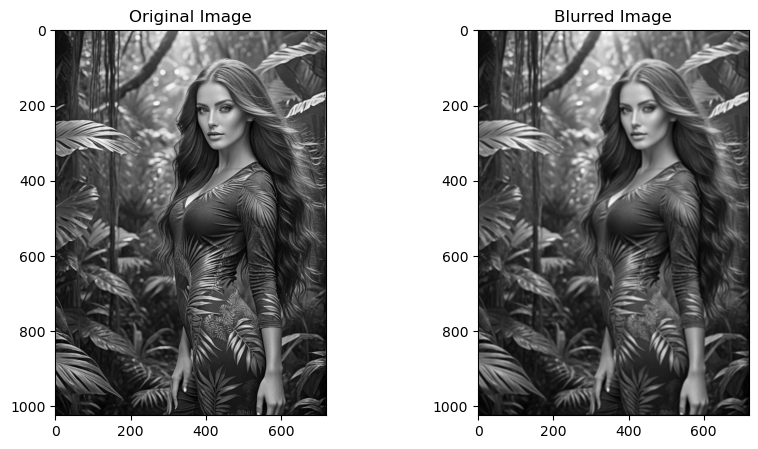

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def gaussian_kernel(size, sigma):
    """Generate a Gaussian kernel"""
    kernel = np.fromfunction(
             lambda x , y : (1/(2**np.pi * sigma**2)) * 
             np.exp(-((x - (size-1)/2)**2 + (y - (size - 1 )/2)**2)/ (2 * sigma**2)),
             (size, size)
    )
    return kernel / np.sum(kernel)

def convolve(image, kernel):
    """Convolve an image with a kernel"""
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    # calculate the padding
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    # pad the image
    padded_image = np.pad(image, ((pad_height , pad_height), (pad_width , pad_width)), mode='constant')
    output = np.zeros_like(image)
    # Convolution operation
    for i in range(image_height):
        for j in range(image_width):
            output[i, j] = np.sum(kernel * padded_image[i:i+kernel_height , j:j+kernel_width])
    return output

image = cv2.imread('image.jpeg' , cv2.IMREAD_GRAYSCALE)
sigma = 2.0
kernel_size = 5
# generate gaussian kernel
kernel = gaussian_kernel(kernel_size, sigma)

# Apply Gaussian blur
blurred_image = convolve(image, kernel)

# Save the result
cv2.imwrite('blurred_image.jpg', blurred_image)

# Display the original and blurred images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Blurred Image')
plt.imshow(blurred_image, cmap='gray')
plt.show()